# Computer vision - Week_03 - Image segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage import data, filters, color
from skimage.color import rgb2gray

## Segmentation by intensity

Segmenting the image by thresholding means that we set a certain threshold and a condition. If the pixels in the image have a higher value than the given threshold, they will be displayed (part of the foreground), if they are lower, they will not be displayed (part of the background).

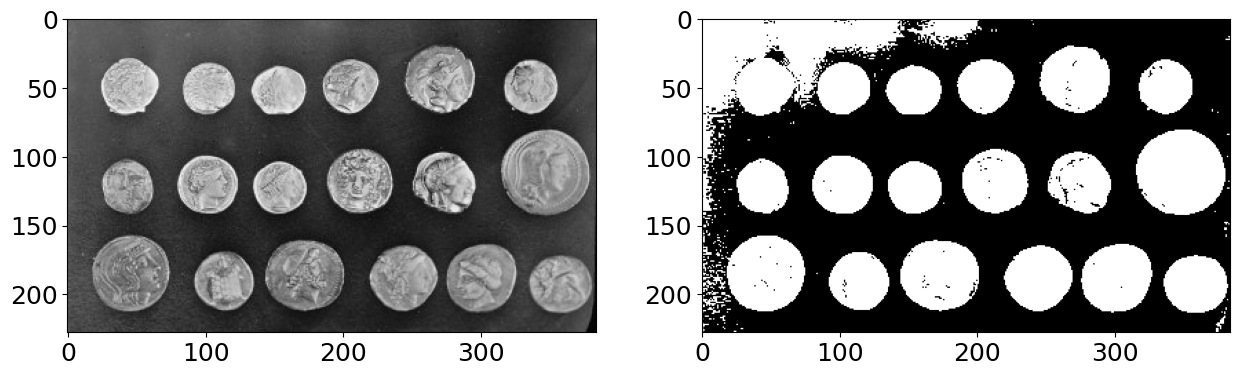

In [13]:
coins = data.coins()
coins = coins[75:, :]
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.imshow(coins, cmap= 'gray')
plt.subplot(122)

threshold = 80
# threshold = 50
#threshold = 150
segmentation_mask_of_coins = coins > threshold

plt.imshow(segmentation_mask_of_coins, cmap= 'gray')

Text(0, 0.5, 'Pixel count')

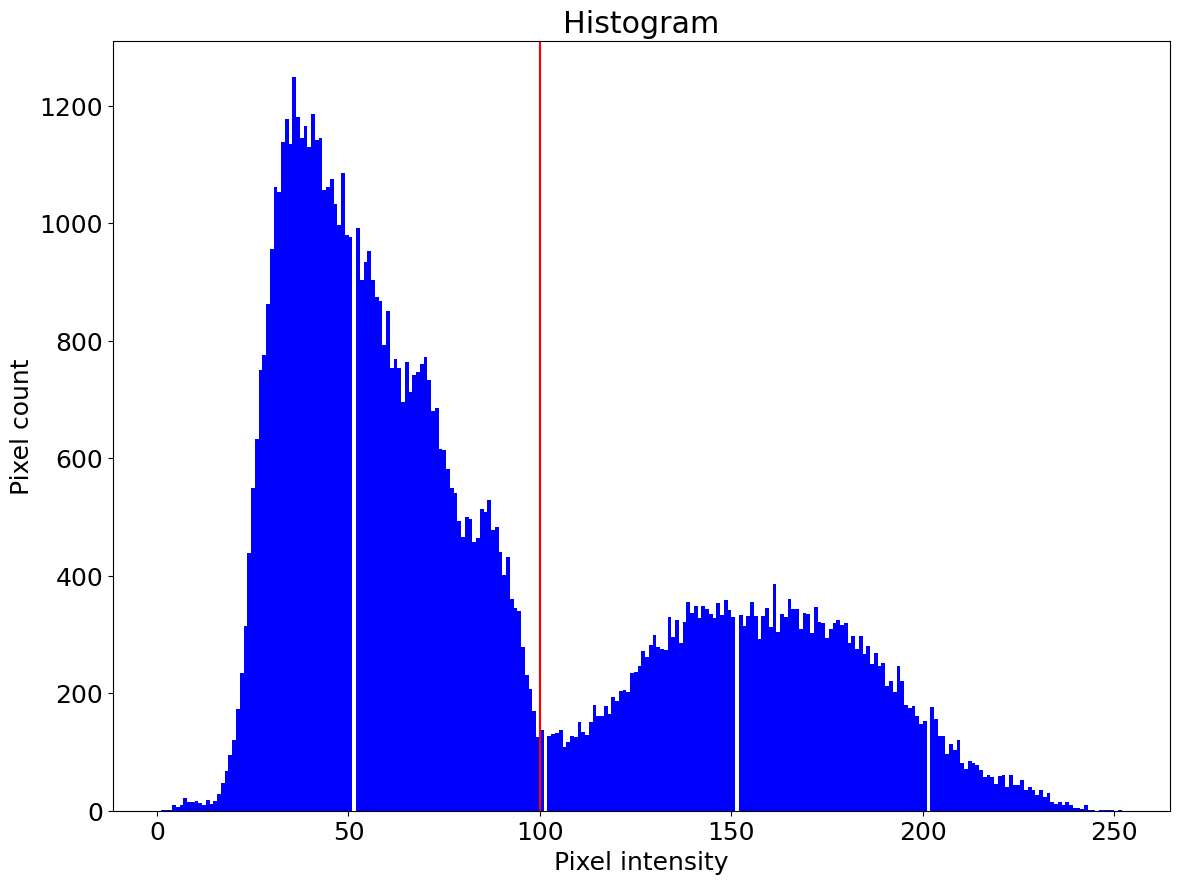

In [8]:
plt.figure(figsize= (30, 10))

ax1 = plt.subplot(121)
plt.hist(coins.ravel(), bins= 256, histtype= 'bar', color= 'blue')
ax1.axvline(threshold, color= 'r')
plt.title("Histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count")

### Optimal threshold finding
In the histogram we can see two distinct peaks. Optimally, the threshold should be located at the intersection of these two curves.

One of the ways to automatically find the value of the threshold is to try to find the intersection of the mentioned Gaussian curves. If the brightness values of background and object pixels follow a Gaussian distribution, this value will be optimal.

We will calculate the average value of the hashes of the foreground points, which at initialization are all the points of the image, except for the mentioned corner points. The threshold initialization value is calculated as the average of the background and foreground brightness values. The image is further thresholded with the current value. We calculate the new background and foreground values and then the new threshold value. The cycle ends if the new threshold value differs from the flood value by only a little, in our case 0.1

Initial threshold value: 130
Converged to optimal threshold in 5 iterations with threshold: 108.13560341311842


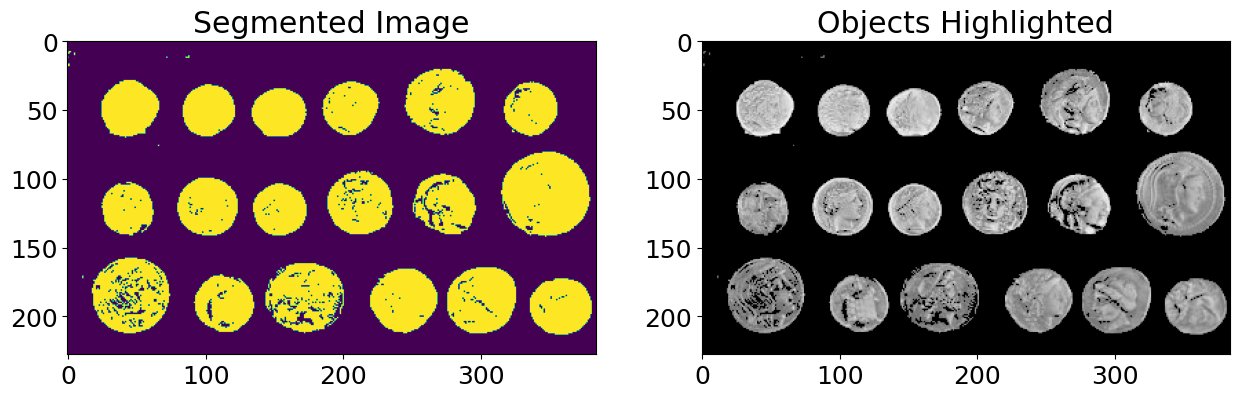

In [9]:
# Load the 'coins' image and set an initial threshold value
# coins = ...  # Load your image here
trshld = 130  # Initial threshold value

# Print the initial threshold value
print("Initial threshold value:", trshld)

# Initialize a counter to keep track of iterations
counter = 0

# Start an iterative process to find the optimal threshold
while True:
    # Create a binary mask for the background and object based on the current threshold
    background = coins < trshld
    obj = coins >= trshld

    # Calculate the mean intensity values for the object and background regions
    meanObjectIntensity = np.mean(coins[obj])
    meanBackgroundIntensity = np.mean(coins[background])

    # Calculate the new threshold value as the average of object and background intensities
    newTrshld = (meanObjectIntensity + meanBackgroundIntensity) / 2

    # Increment the counter
    counter += 1

    # Check if the absolute difference between the old and new threshold is less than 0.01
    if np.abs(trshld - newTrshld) < 0.01:
        break

    # Update the threshold value with the new value for the next iteration
    trshld = newTrshld

# Print the converged optimal threshold and the number of iterations
print("Converged to optimal threshold in {} iterations with threshold: {}".format(counter, trshld))

# Create a plot to visualize the segmented image and the original image with objects highlighted
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(coins > trshld)
plt.title("Segmented Image")
plt.subplot(122)
plt.imshow(coins * (coins > trshld), cmap='gray')
plt.title("Objects Highlighted")
plt.show()

Text(0, 0.5, 'Pixel count')

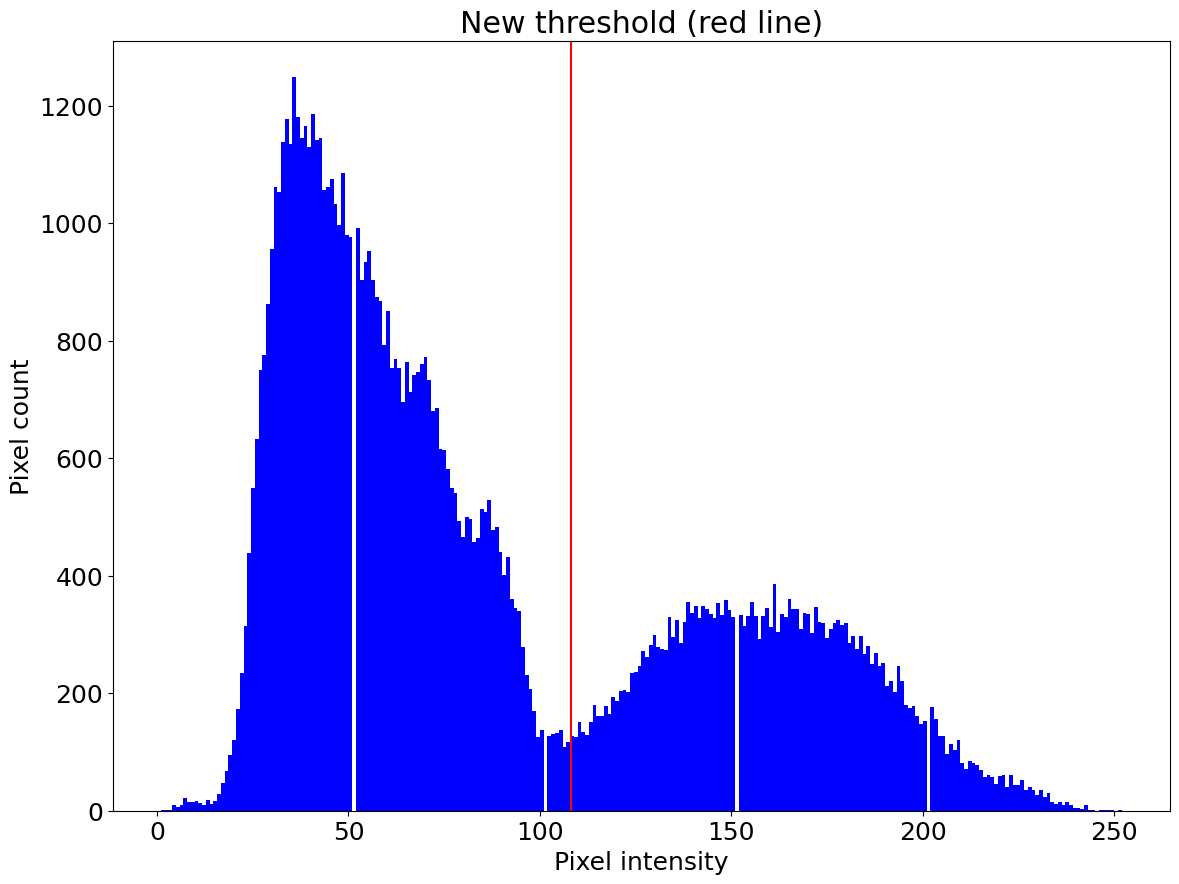

In [10]:
plt.figure(figsize= (30, 10))

ax1 = plt.subplot(121)
plt.hist(coins.ravel(), bins= 256, histtype= 'bar', color= 'blue')
ax1.axvline(trshld, color= 'r')
plt.title("New threshold (red line)")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count")

## Autonomous work 1

Change the algorithm for iteratively finding the optimal threshold value so that the initial threshold is calculated as the average of average brightness for objects and background. We consider corner pixels to belong to the background.

Initial threshold value: 68.05374823804448
Converged to optimal threshold in 8 iterations with threshold: 107.44951846053775


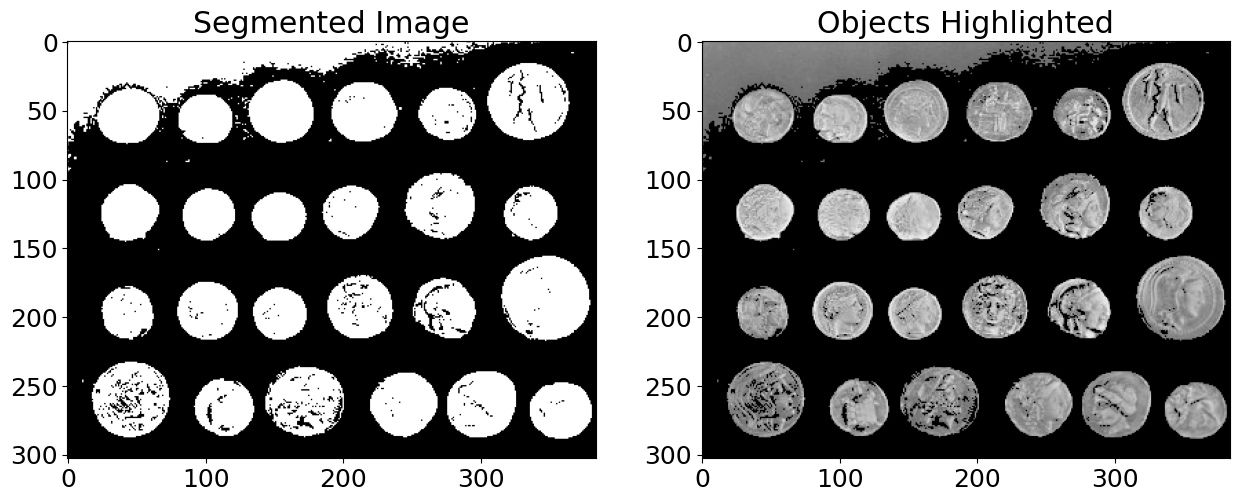

In [30]:
# Load the 'coins' image from skimage's data module for this example
coins = data.coins()

# Define the corner pixels mask
corner_mask = np.zeros_like(coins, dtype=bool)
corner_mask[0, 0] = True  # Top-left corner
corner_mask[0, -1] = True  # Top-right corner
corner_mask[-1, 0] = True  # Bottom-left corner
corner_mask[-1, -1] = True  # Bottom-right corner

# Calculate the average intensity of the background using the corner pixels
meanBackgroundIntensity = np.mean(coins[corner_mask])

# Calculate the average intensity of the objects using the non-corner pixels
meanObjectIntensity = np.mean(coins[~corner_mask])

# Calculate the initial threshold value
trshld = (meanObjectIntensity + meanBackgroundIntensity) / 2

# Print the initial threshold value
print("Initial threshold value:", trshld)

# Initialize a counter to keep track of iterations
counter = 0

# Start an iterative process to find the optimal threshold
while True:
    # Create a binary mask for the background and object based on the current threshold
    background = coins < trshld
    obj = coins >= trshld

    # Calculate the mean intensity values for the object and background regions
    meanObjectIntensity = np.mean(coins[obj])
    meanBackgroundIntensity = np.mean(coins[background])

    # Calculate the new threshold value as the average of object and background intensities
    newTrshld = (meanObjectIntensity + meanBackgroundIntensity) / 2

    # Increment the counter
    counter += 1

    # Check if the absolute difference between the old and new threshold is less than 0.01
    if np.abs(trshld - newTrshld) < 0.01:
        break

    # Update the threshold value with the new value for the next iteration
    trshld = newTrshld

# Print the converged optimal threshold and the number of iterations
print("Converged to optimal threshold in {} iterations with threshold: {}".format(counter, trshld))

# Create a plot to visualize the segmented image and the original image with objects highlighted
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(coins > trshld, cmap='gist_gray')
plt.title("Segmented Image")
plt.subplot(122)
plt.imshow(coins * (coins > trshld), cmap='gist_gray')
plt.title("Objects Highlighted")
plt.show()

### Uneven lighting
However, thresholding with one strip for all points of the image is not suitable, for example, if the scene is not evenly lit.
`plt.imshow(page < 120)`

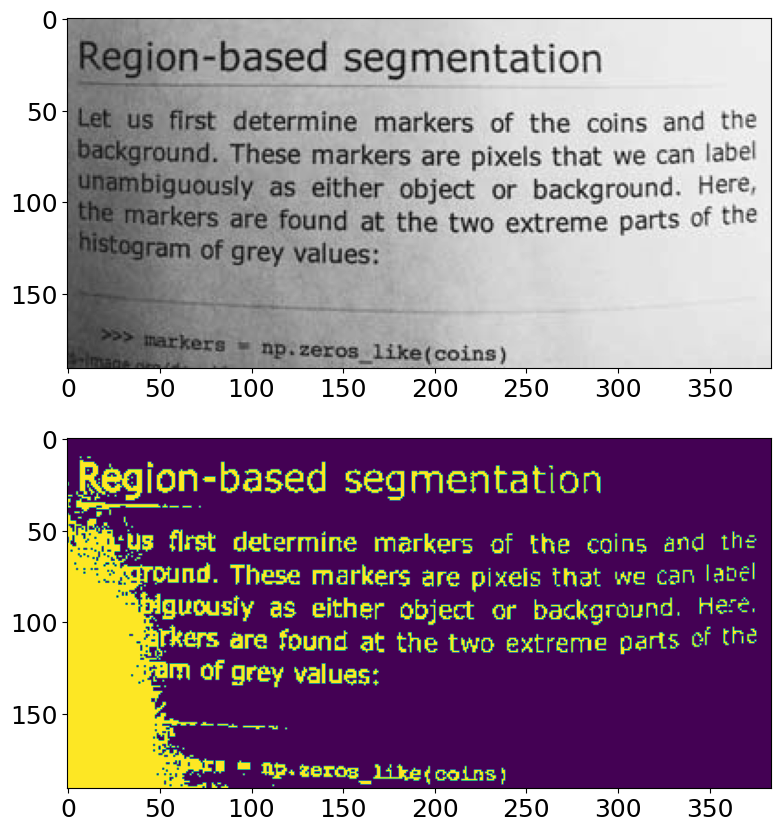

In [29]:
page = data.page()
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(211)
plt.imshow(page, cmap= 'gray')
plt.subplot(212)
plt.imshow(page < 120)

### Implemented segmentation algorithms
A quick overview of the different segmentation algorithms available in SKimage.

With uneven lighting, we cannot rely only on simple segmentation, as part of the image will be mostly incomprehensible, as you can see in the image above. If we were to set the threshold below a lower value, we would no longer see pixels with a high value, for example the letters on the right side of the image. Since they are more illuminated, they may not be visible if we choose a lower threshold for letters in the shadow.

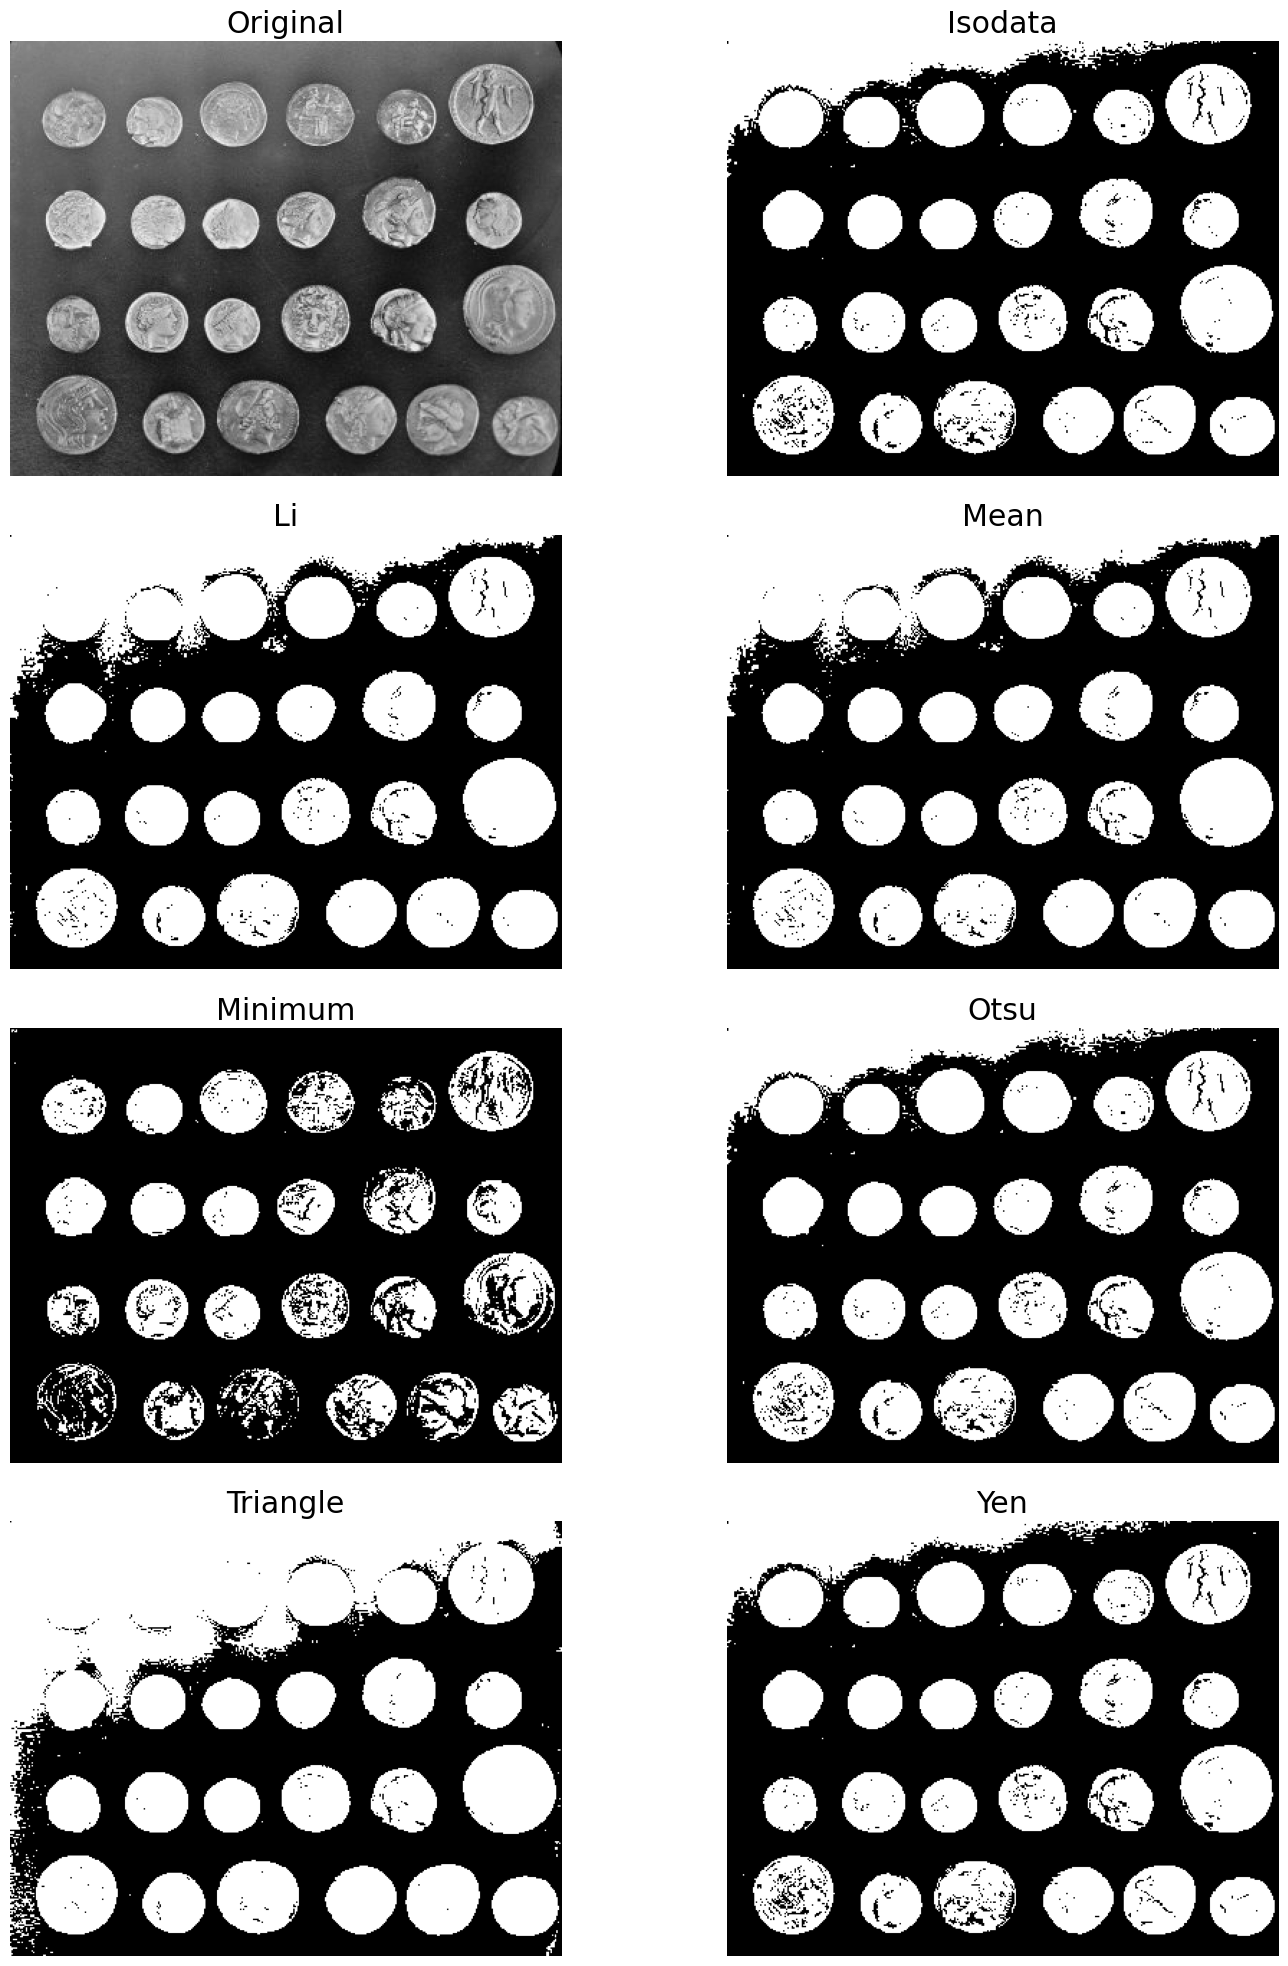

In [33]:
fig, ax = filters.try_all_threshold(coins, figsize= (16, 20), verbose= False)
plt.rcParams['font.size']=18
plt.show()

### Local filtering

Segmenting an unevenly lit image can be done using local filtering, whereby we calculate the thresholds for various segments using the average brightness value of its pixels. The implementation of such an algorithm can be found in the box below with the following parameter:

- sElem = disk(20): This line creates a circular structuring element (disk) with a radius of 20 pixels. This structuring element is typically used in morphological operations, such as filtering or erosion.

/home/jakubbaransky/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


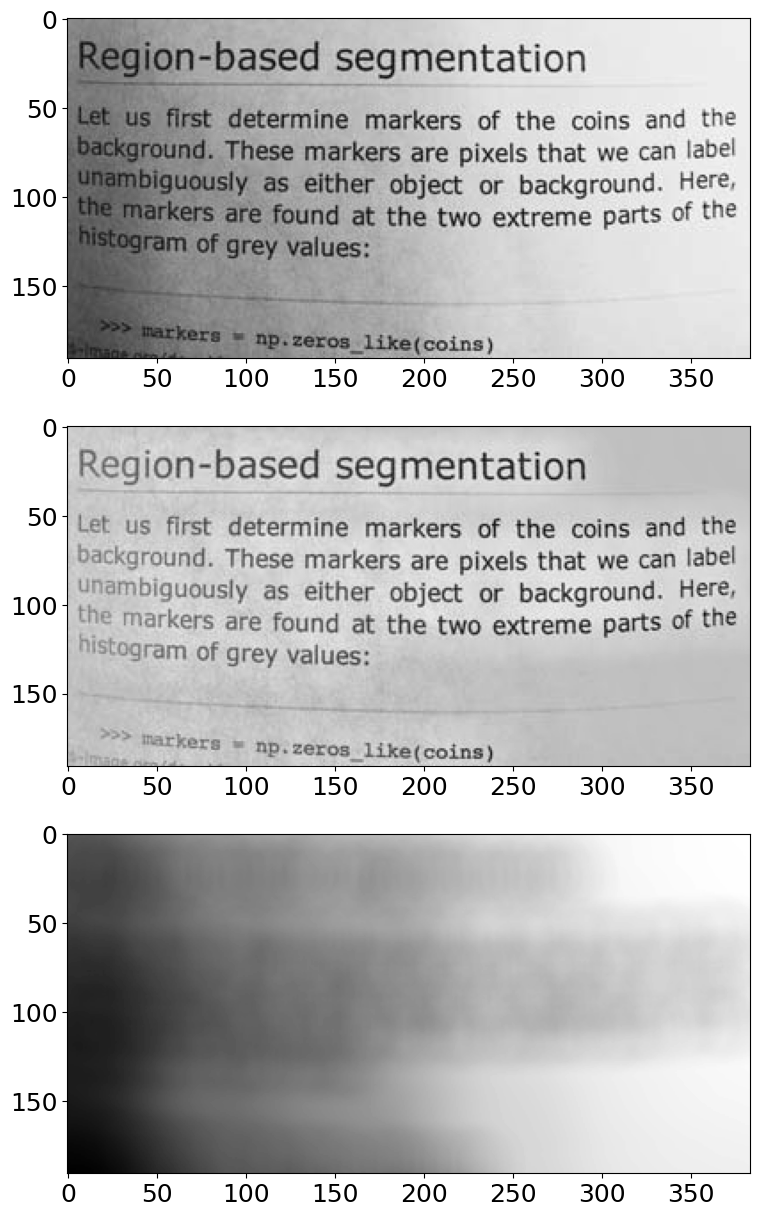

In [37]:
sElem = disk(20)
pageFloat = page / 255
pageFilt  = filters.rank.mean(pageFloat, footprint=sElem) / 255

plt.figure(figsize= (20, 15))
plt.subplot(311)
plt.imshow(page, cmap= 'gray')
plt.subplot(312)
plt.imshow((pageFloat - pageFilt), cmap= 'gray')
plt.subplot(313)
plt.imshow(pageFilt, cmap= 'gray')

The code applies local mean filtering to the input image and generates two thresholded images (pageT1 and pageT2) based on the difference between the original image and the mean-filtered image.

- pageT1 = (pageFloat - pageFilt) < 0.0: It creates a binary thresholded image pageT1 by subtracting the mean-filtered image (pageFilt) from the original image (pageFloat) and checking if the result is less than 0.0. This essentially identifies regions where the pixel values are lower than the local mean.
- pageT2 = (pageFloat - pageFilt) < -0.05: Similarly, it creates another binary thresholded image pageT2, but with a more negative threshold of -0.05. This means it identifies regions where the pixel values are significantly lower than the local mean.

The choice of threshold values (-0.05 and 0.0) determines the sensitivity of the thresholding operation.

ValueError: cannot reshape array of size 921196 into shape (400,)

## Autonomous work 2

Download the Sonet to Lena image (`sonet_lena.jpg` in example files), and test adaptive local filtering on it. Add working with absolute values to the algorithm above so that you avoid comparing negative values. Find the optimal threshold value for segmenting.

Image shape: (782, 589, 2)


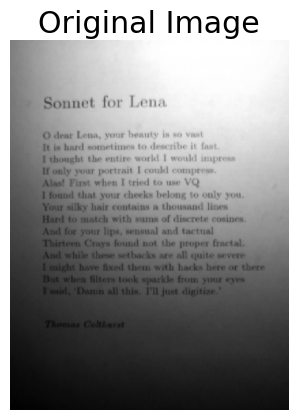

In [58]:
from skimage import io

image = io.imread('sonet_lena.png')

print(f'Image shape: {image.shape}')

if image.shape[2] == 2:
    image = image[:, :, 0]
elif image.shape[2] == 4:
    image = image[:, :, :3]

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


## Segmentation by color
Color segmentation is a computer vision and image processing technique used to partition an image into distinct regions or objects based on their color characteristics. It involves separating objects or regions in an image by identifying and classifying pixels or areas that share similar color properties. Color segmentation is commonly used in applications like object recognition, image processing, and computer vision to extract meaningful information from images.

Color models, also known as color spaces, are mathematical representations that define how colors are represented and encoded in digital images. These models provide a way to represent colors in a manner that is perceptually meaningful and suitable for various applications. Common color models include RGB (Red, Green, Blue), HSV (Hue, Saturation, Value), CMYK (Cyan, Magenta, Yellow, Key/Black), and Lab (CIELAB or Lab*).

In [59]:
cars = plt.imread('color_cars.jpeg')
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cars)
plt.subplot(222)
plt.imshow(cars[:,:,0], cmap= 'gray')
plt.title('Intensity of Red')
plt.subplot(223)
plt.imshow(cars[:,:,1], cmap= 'gray')
plt.title('Intensity of Green')
plt.subplot(224)
plt.imshow(cars[:,:,2], cmap= 'gray')
plt.title('Intensity of Blue')

FileNotFoundError: [Errno 2] No such file or directory: '/home/jakubbaransky/DataspellProjects/ComputerVisionZS/example files/color_cars.jpeg'

CIELAB, often referred to as Lab color space, is a color model designed to approximate human perception of color. It is a three-component color space consisting of the following components:

* L* (lightness): Represents the brightness or intensity of a color from black (0) to white (100).
* a* (green to red): Represents the position of a color on the green-to-red axis.
* b* (blue to yellow): Represents the position of a color on the blue-to-yellow axis.

CIELAB is perceptually uniform, meaning that the Euclidean distance between two Lab colors corresponds closely to the perceived color difference between them.


![CieLab](https://www.xrite.com/-/media/modules/weblog/blog/lab-color-space/lab-color-space.png?h=622&w=600&la=en&hash=53A76941BAB3015346FAB3689739E967843CF8EA)

In [60]:
carsLab = color.rgb2lab(cars)


plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cars)
plt.subplot(222)
plt.imshow(carsLab[:,:,0], cmap= 'gray')
plt.title('L')
plt.subplot(223)
plt.imshow(carsLab[:,:,1], cmap= 'gray')
plt.title('a')
plt.subplot(224)
plt.imshow(carsLab[:,:,2], cmap= 'gray')
plt.title('b')

NameError: name 'cars' is not defined

Segmentation for a specific color (red):

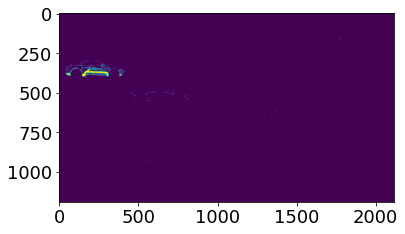

In [16]:
my_car = (carsLab[:,:,1] > 40) * (carsLab[:,:,2] < 30)
plt.imshow(my_car)

## Autonomous work 3

Implement color segmentation so that you select the color of an arbitrary pixel (given by coordinates *a*, *b*), and the segmentation will select all pixels whose color is within a certain distance from the color of the selected pixel. The distance between two colors is defined in the context of a color model as a circle with a given radius. Your implementation should work with parameters *a* and *b* (coordinates of the selected pixel), and *r* (radius of the color circle).